In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import minimize
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess, arma_acf, arma_pacf
from statsmodels.tsa.arima.model import ARIMA

# Parameter Estimation in MA(1)

Estimating the parameters of ARMA (as well as ARIMA, SARIMA models) is much harder
than parameter estimation in AR models which was handled by standard regression (ordinary
least squares). We will not study this topic in any detail (and simply rely on the ARIMA function for fitting
these models to data). But today, we will discuss estimation for MA(1) to gain some insight into how estimation works in these models. 


Recall that the MA(1) model is given by
\begin{equation*}
  y_t = \mu + \epsilon_t + \theta \epsilon_{t-1}
\end{equation*}
with $\epsilon_t \overset{\text{i.i.d}}{\sim} N(0, \sigma^2)$. For parameter estimation, we need to write down the likelihood. 

### Likelihood

The
joint density of $y_1, \dots, y_n$ is multivariate normal with mean
vector $m := (\mu, \dots, \mu)^T$ and
covariance matrix $\Sigma$ where $\Sigma$ equals the $n \times n$
matrix whose 
$(i, j)^{th}$ entry is given by $\sigma^2 (1 + \theta^2)$ when $i = j$, equals $\sigma^2 \theta$ when $|i - j| = 1$ and equals 0 for all other $(i, j)$. The likelihood is therefore
\begin{align*}
  \left(\frac{1}{\sqrt{2 \pi}} \right)^n \left(\det \Sigma
  \right)^{-1/2} \exp \left( - \frac{1}{2} (y - m)' \Sigma^{-1} (y -
  m)\right)
\end{align*}
where $y$ is the $n \times 1$ vector with components $y_1, \dots,
y_n$. This is a function of the unknown parameters $\mu, \theta,
\sigma$ which can be estimated by maximizing the logarithm of the
likelihood. The presence of $\Sigma^{-1}$ makes this computationally
expensive. Some (exact or approximate) formula should be used for
$\Sigma^{-1}$ so that one does not need to invert an $n \times n$
matrix every time the log-likelihood is to be computed.

### Conditional Likelihood

Instead of the full likelihood, the form of the conditional likelihood when conditioned on $\epsilon_0 = 0$ is simpler. This is similar to the story for the AR(1) model where the form of the likelihood when conditioned on $y_1$ is much simpler than the full likelihood. The difference here is that instead of conditioning on $y_1$ being the observed value, we are conditioning on $\epsilon_0 = 0$. 

Below we write the conditional likelihood: 
\begin{equation*}
   f_{y_1, \dots, y_n \mid \epsilon_0 = 0}(y_1, \dots, y_n). 
\end{equation*}
This likelihood can be broken down as
\begin{equation*}
  f_{y_1 \mid \epsilon_0 = 0}(y_1) f_{y_2 \mid y_1, \epsilon_0 = 0}(y_2) f_{y_3 \mid y_1, y_2, \epsilon_0 = 0}(y_3) \dots f_{y_n \mid y_1, \dots, y_{n-1}, \epsilon_0 = 0}(y_n)
\end{equation*}
Each of the terms above can be written explicitly. Let $\hat{\epsilon}_1 = y_1 - \mu$ and, for $t = 2, \dots, n$, 
\begin{equation*}
    \hat{\epsilon}_t = y_t- \mu - \theta \hat{\epsilon}_{t-1} 
\end{equation*}
Then 
\begin{equation*}
   f_{y_1 \mid \epsilon_0 = 0}(y_1) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(y_1 - \mu)^2}{2 \sigma^2} \right)
\end{equation*}
and
\begin{align*}
  f_{y_t \mid y_1, \dots, y_{t-1}, \epsilon = 0}(y_t) &= f_{y_t \mid \epsilon_1 = \hat{\epsilon}_1, \epsilon_2 = \hat{\epsilon}_2, \dots, \epsilon_{t-1} = \hat{\epsilon}_{t-1}, \epsilon_0 = 0}(y_t) \\
  &= f_{\epsilon_t}(y_t - \mu - \theta \hat{\epsilon}_{t-1}) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{1}{2 \sigma^2} (y_t - \mu - \theta \hat{\epsilon}_{t-1})^2 \right). 
\end{align*}
Thus the conditional likelihood given $\epsilon_0 = 0$ is given by
\begin{align*}
   \text{likelihood} &= \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(y_1 - \mu)^2}{2 \sigma^2} \right) \left[\prod_{t=2}^n \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{1}{2 \sigma^2} (y_t - \mu - \theta \hat{\epsilon}_{t-1})^2 \right) \right] \\ & = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{\hat{\epsilon}_1^2}{2 \sigma^2} \right) \left[\prod_{t=2}^n \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{\hat{\epsilon}_t^2}{2 \sigma^2}  \right) \right] \\
   &= \left(\frac{1}{\sigma \sqrt{2 \pi}} \right)^n \exp \left(-\frac{1}{2 \sigma^2} \sum_{t=1}^n \hat{\epsilon}_t^2 \right). 
\end{align*}
The key term in the above likelihood is $\sum_{t=1}^n \hat{\epsilon}_t^2$ which depends on the data $\{y_t\}$ and also on the parameters $\mu$ and $\theta$. So let us denote
\begin{align*}
   S(\mu, \theta) := \sum_{t=1}^n \hat{\epsilon}_t^2
\end{align*}
so that the likelihood and log-likelihood become
\begin{align*}
   \text{likelihood} = \left(\frac{1}{\sigma \sqrt{2 \pi}} \right)^n \exp \left(-\frac{S(\mu, \theta)}{2 \sigma^2} \right)
\end{align*}
and 
\begin{align*}
   \text{log-likelihood} = -\frac{n}{2} \log (\sigma^2) - \frac{S(\mu, \theta)}{2 \sigma^2}. 
\end{align*}
Thus the MLEs of $\mu, \theta$ are obtained by minimizing $S(\mu, \theta)$, and the MLE of $\sigma$ is 
\begin{align*}
   \hat{\sigma} = \sqrt{\frac{S(\hat{\mu}, \hat{\theta})}{n}}
\end{align*}

In [ ]:
def S_func(params, y): # this is the function S(\mu, \theta)
    mu, theta = params
    n = len(y)
    eps = np.zeros(n)
    eps[0] = y[0] - mu
    for t in range(1, n):
        eps[t] = y[t] - mu - theta * eps[t-1]
    S_val = np.sum(eps**2)
    return S_val

We will use the function 'minimize' from scipy.optimize to minimize S_func. First let us simulate some data from the MA(1) model with theta = -0.7 to evaluate the performance of our estimation strategy. 

In [21]:
arma_process = ArmaProcess([1], [1, -0.7])
dt = arma_process.generate_sample(nsample=400)
dt = dt + 5 # adding a mean of 5

The output from the ARIMA function is given below. 

In [ ]:
md = ARIMA(dt, order=(0, 0, 1)).fit()
print(md.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -559.755
Date:                Sat, 22 Nov 2025   AIC                           1125.511
Time:                        19:48:49   BIC                           1137.485
Sample:                             0   HQIC                          1130.253
                                - 400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0092      0.017    296.502      0.000       4.976       5.042
ma.L1         -0.6566      0.037    -17.828      0.000      -0.729      -0.584
sigma2         0.9603      0.066     14.579      0.0

Let us now minimize $S(\mu, \theta)$ and compare the resulting estimates of $\mu$ and $\theta$ with those reported by the ARIMA function. 

In [23]:
# Initial guess: [mu_init, theta_init]
mu_init = np.mean(dt)
theta_init = 0
init_params = [mu_init, theta_init]

# Perform the optimization
result = minimize(S_func, init_params, args=(dt,))
print(result)
mu_hat, theta_hat = result.x

print("Estimated mu:", mu_hat)
print("Estimated theta:", theta_hat)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 384.13856984891936
        x: [ 5.009e+00 -6.582e-01]
      nit: 10
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 1.476e-04 -1.728e-06]
            [-1.728e-06  6.930e-04]]
     nfev: 51
     njev: 17
Estimated mu: 5.009073896055675
Estimated theta: -0.6582279929829957


In [24]:
print(result.x)
print(md.params)

[ 5.0090739  -0.65822799]
[ 5.00917415 -0.65657733  0.96028995]


The estimates of $\mu$ and $\theta$ obtained by minimizing $S(\mu, \theta)$ are clearly very close to those reported by the ARIMA function. The estimate of $\sigma$ is given by $\sqrt{S(\hat{\mu}, \hat{\theta})/n}$. 

In [25]:
sigma_hat = np.sqrt(S_func(result.x, dt) / len(dt))
print("Estimated sigma:", sigma_hat)
print("ARIMA reported sigma:", np.sqrt(md.params[2]))

Estimated sigma: 0.9799726652424028
ARIMA reported sigma: 0.9799438524963823


## Standard Errors corresponding to the parameter estimates

After obtaining the MLEs $\hat{\mu}$ and $\hat{\theta}$, the next step is to obtain standard errors. For this, we can use the Bayesian approach with the standard prior: 
\begin{align*}
   \mu, \theta, \log \sigma \overset{\text{i.i.d}}{\sim} \text{unif}(-C, C). 
\end{align*}

The posterior is then
\begin{align*}
  f_{\mu, \theta, \sigma \mid \text{data}}(\mu, \theta, \sigma) &\propto   \left(\frac{1}{\sqrt{2 \pi}\sigma}\right)^n  \exp
  \left(-\frac{S(\mu, \theta)}{2 \sigma^2} \right) \times 
                                                                  \frac{1}{\sigma}
                                                                  I\{
                                                                  -C <
                                                                  \mu, \theta,
                                                                  \log
                                                                  \sigma
                                                                  <
                                                                  C\}
  \\ 
  &\propto \sigma^{-n-1} \exp
  \left(-\frac{S(\mu, \theta)}{2 \sigma^2} \right) I\{
                                                                  -C <
                                                                  \mu, \theta,
                                                                  \log
                                                                  \sigma
                                                                  <
                                                                  C\}
\end{align*}
This is the joint posterior of $\mu, \theta, \sigma$. To obtain the posterior of $\mu, \theta$ (without $\sigma$), we integrate the above over $\sigma$ (from 0 to $\infty$). This integration is exactly the same as Lecture 4, and we get
\begin{align*}
   f_{\mu, \theta \mid \text{data}}(\mu, \theta) \propto \left(\frac{1}{S(\mu, \theta)} \right)^{n/2} I\{
                                                                  -C <
                                                                  \mu, \theta
                                                                  <
                                                                  C\} \propto \left(\frac{S(\hat{\mu}, \hat{\theta})}{S(\mu, \theta)} \right)^{n/2} I\{
                                                                  -C <
                                                                  \mu, \theta
                                                                  <
                                                                  C\}
\end{align*}
If $S(\mu, \theta)$ is a quadratic function of $\mu, \theta$, then this will be a $t$-density. However our $S(\mu, \theta)$ will involve higher powers of $\theta$ and is not quadratic. The posterior usually is fairly concentrated around the MLE $(\hat{\mu}, \hat{\theta})$ though, so we it makes sense to approximate $S(\mu, \theta)$ by a quadratic around $(\hat{\mu}, \hat{\theta})$. This is done by Taylor expansion as follows. Let $\alpha = (\mu, \theta)$ and $\hat{\alpha} =
(\hat{\mu}, \hat{\theta})$. Taylor expansion for $\alpha$ near
$\hat{\alpha}$ gives 
\begin{align*}
  S(\alpha) &= S(\hat{\alpha}) + \left<\nabla S(\hat{\alpha}), \alpha
              - \hat{\alpha} \right> + \left(\alpha - \hat{\alpha}
              \right)^T \left(\frac{1}{2} HS(\hat{\alpha}) \right) \left(\alpha - \hat{\alpha}
              \right) \\
  &= S(\hat{\alpha}) + \left(\alpha - \hat{\alpha}
              \right)^T \left(\frac{1}{2} HS(\hat{\alpha}) \right) \left(\alpha - \hat{\alpha}
              \right)
\end{align*}
where we used $\nabla S(\hat{\alpha}) = 0$ because $\hat{\alpha}$
minimizes $S(\alpha)$. Here $HS(\hat{\alpha})$ denotes the Hessian of
$S$ at $\hat{\alpha}$.  

Therefore
\begin{align*}
 & f_{\mu, \theta \mid \text{data}}(\mu, \theta) \\ &\propto
                                                  \left(\frac{1}{S(\mu,
                                                  \theta)}
                                                  \right)^{n/2}  I\{
                                                  -C < \mu, \theta < C\} \\
  &\propto \left(\frac{S(\hat{\alpha})}{S(\alpha)}
                                                  \right)^{n/2}  I\{
    -C < \mu, \theta < C\} \\
  &= \left(\frac{S(\hat{\alpha})}{S(\hat \alpha) + \left(\alpha - \hat{\alpha}
              \right)^T \left(\frac{1}{2} HS(\hat{\alpha}) \right) \left(\alpha - \hat{\alpha}
              \right)}
                                                  \right)^{n/2}  I\{-C < \mu, \theta < C\} \\
  &= \left(\frac{1}{1 + \left(\alpha - \hat{\alpha}
              \right)^T \left(\frac{1}{2 S(\hat{\alpha})} HS(\hat{\alpha}) \right) \left(\alpha - \hat{\alpha}
              \right)}
                                                  \right)^{n/2}  I\{-C < \mu, \theta < C\} \\
  &= \left(\frac{1}{1 + \frac{1}{n-2}\left(\alpha - \hat{\alpha}
              \right)^T \left(\frac{n-2}{2 S(\hat{\alpha})} HS(\hat{\alpha}) \right) \left(\alpha - \hat{\alpha}
              \right)}
                                                  \right)^{\frac{n-2+2}{2}}  I\{-C < \mu, \theta < C\}. 
\end{align*}
Comparing the above with the formula:
\begin{align*}
  \left(\frac{1}{1 + \frac{1}{k} (x - m)^T \Sigma^{-1} (x - m)} \right)^{\frac{k + p}{2}}
\end{align*}
for the $p$-variate $t$-density $t_{k, p}(\mu, \Sigma)$, we see that
(ignoring the indicator function $ I\{-C < \mu, \theta < C\}$)
\begin{align*}
  \alpha \mid \text{data} \sim t_{n-2, 2} \left(\hat{\alpha},
  \frac{S(\hat{\alpha})}{n - 2} \left(\frac{1}{2} HS(\hat{\alpha})
  \right)^{-1} \right). 
\end{align*}
So the standard errors corresponding to $\mu$ and $\theta$ can be obtained by taking the square roots of the diagonal entries of 
\begin{align*}
\frac{S(\hat{\alpha})}{n - 2} \left(\frac{1}{2} HS(\hat{\alpha})
  \right)^{-1}
\end{align*}
In order to compute these, we need to calculate the Hessian of $S(\alpha)$ with respect to $\alpha$. We will use numerical differentiation (specifically a function from the library numdifftools) for this. 


In [ ]:
import numdifftools as nd 
# this library has functions to calculate first and second derivatives 

alphaest = result.x
n = len(dt)
H = nd.Hessian(lambda alpha: S_func(alpha, dt), step = 1e-6)(alphaest)

sighat = np.sqrt(S_func(alphaest, dt) / (n - 2))
covmat = (sighat ** 2) * np.linalg.inv(0.5 * H)
stderrs = np.sqrt(np.diag(covmat))

# ---- Output ----
print("Estimated mu:", alphaest[0])
print("Estimated theta:", alphaest[1])
print("Estimated sigma:", sighat)
print("Covariance matrix:\n", covmat)
print("Standard errors:", stderrs)

#The standard errors of mu and theta reported by ARIMA function are:
print("ARIMA standard errors:", md.bse[0:2])

Estimated mu: 5.009073896055675
Estimated theta: -0.6582279929829957
Estimated sigma: 0.9824318225976606
Covariance matrix:
 [[ 2.84046626e-04 -2.35806811e-06]
 [-2.35806811e-06  1.33611939e-03]]
Standard errors: [0.01685368 0.03655297]
ARIMA standard errors: [0.01689423 0.03682785]


It is easy to see that the standard errors obtained by our formula are very close to the standard errors reported by the ARIMA function. 

## Varve Dataset from Lecture 21

Let us see if the numbers from the calculations above match with those reported by ARIMA on the varve dataset (which we used in Lecture 21). 

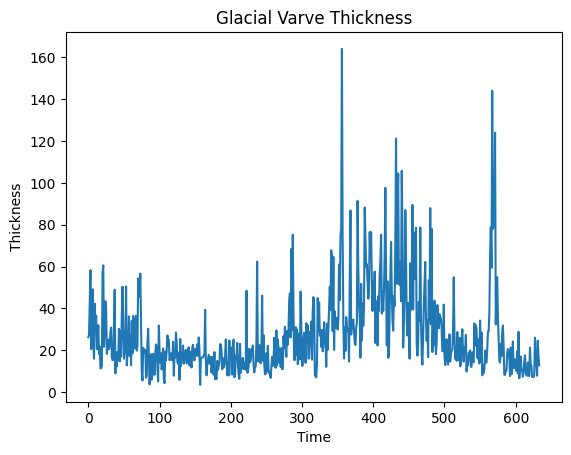

In [27]:
varve_data = pd.read_csv("varve.csv")
yraw = varve_data['x']
plt.plot(yraw)
plt.xlabel('Time')
plt.ylabel('Thickness')
plt.title('Glacial Varve Thickness')
plt.show()

In Lecture 21, we fit the MA(1) model to the differences of logarithms of this dataset. 

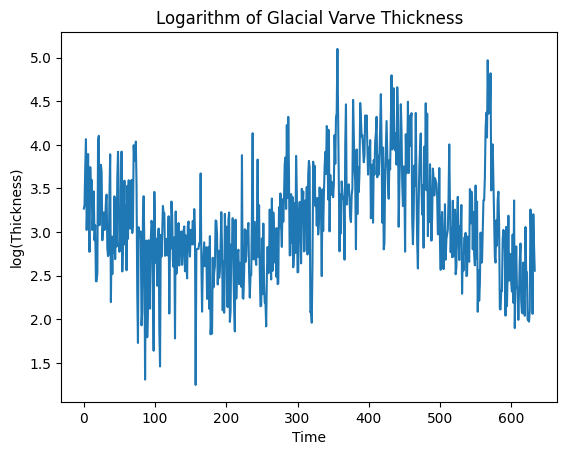

In [ ]:
# First take logarithms: 
ylog = np.log(yraw)
plt.plot(ylog)
plt.xlabel('Time')
plt.ylabel('log(Thickness)')
plt.title('Logarithm of Glacial Varve Thickness')
plt.show()

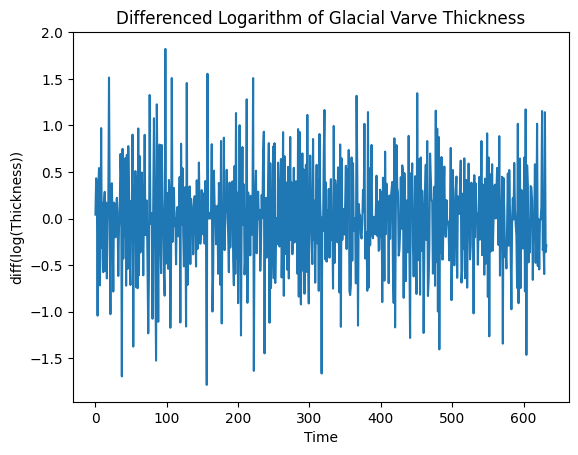

In [ ]:
# Then take differences:
ylogdiff = np.diff(ylog)
plt.plot(ylogdiff)
plt.xlabel('Time')
plt.ylabel('diff(log(Thickness))')
plt.title('Differenced Logarithm of Glacial Varve Thickness')
plt.show()

From the sample acf and pacf plots for this data, it is clear that MA(1) is appropriate. 

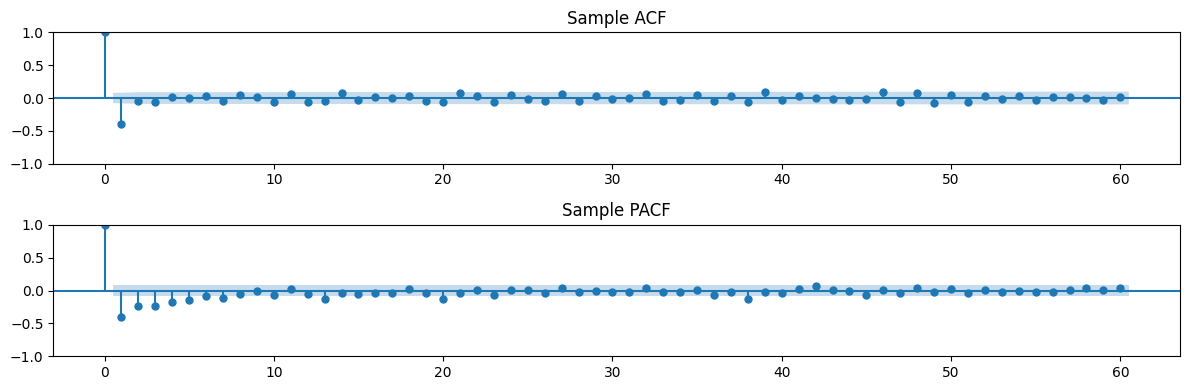

In [30]:
L = 60
# Plot sample ACF/PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4))
plot_acf(ylogdiff, lags=L, ax=ax1, title='Sample ACF')
plot_pacf(ylogdiff, lags=L, ax=ax2, title='Sample PACF')
plt.tight_layout()
plt.show()

The MA(1) model can be fit to this data as follows. 

In [31]:
mamod = ARIMA(ylogdiff, order=(0, 0, 1)).fit()
print(mamod.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  633
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -440.678
Date:                Sat, 22 Nov 2025   AIC                            887.356
Time:                        19:48:49   BIC                            900.707
Sample:                             0   HQIC                           892.541
                                - 633                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.004     -0.280      0.779      -0.010       0.008
ma.L1         -0.7710      0.023    -33.056      0.000      -0.817      -0.725
sigma2         0.2353      0.012     18.881      0.0

We now use our functions to check if they result in similar numbers for the estimates and standard errors.

In [ ]:
def S_func(params, y): # this is the function S(\mu, \theta)
    mu, theta = params
    n = len(y)
    eps = np.zeros(n)
    eps[0] = y[0] - mu
    for t in range(1, n):
        eps[t] = y[t] - mu - theta * eps[t-1]
    S_val = np.sum(eps**2)
    return S_val

In [33]:
dt = ylogdiff

# Initial guess: [mu_init, theta_init]
mu_init = np.mean(dt)
theta_init = 0
init_params = [mu_init, theta_init]

# Perform the optimization
result = minimize(S_func, init_params, args=(dt,))
print(result)
mu_hat, theta_hat = result.x

print("Estimated mu:", mu_hat)
print("Estimated theta:", theta_hat)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 149.0042362521212
        x: [-1.137e-03 -7.728e-01]
      nit: 12
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 4.132e-05  4.927e-06]
            [ 4.927e-06  2.550e-03]]
     nfev: 63
     njev: 21
Estimated mu: -0.0011366484142282629
Estimated theta: -0.7728310145141554


In [34]:
print(result.x)
print(mamod.params)

[-0.00113665 -0.77283101]
[-0.00125667 -0.77099236  0.23528045]


In [35]:
sigma_hat = np.sqrt(S_func(result.x, dt) / len(dt))
print("Estimated sigma:", sigma_hat)
print("MA reported sigma:", np.sqrt(mamod.params[2]))

Estimated sigma: 0.485173925675123
MA reported sigma: 0.4850571581949342


The estimates are very close to each other. Below are the standard errors. 

In [ ]:
alphaest = result.x
n = len(dt)
H = nd.Hessian(lambda alpha: S_func(alpha, dt), step = 1e-6)(alphaest)

sighat = np.sqrt(S_func(alphaest, dt) / (n - 2))
covmat = (sighat ** 2) * np.linalg.inv(0.5 * H)
stderrs = np.sqrt(np.diag(covmat))

# ---- Output ----
print("Estimated mu:", alphaest[0])
print("Estimated theta:", alphaest[1])
print("Estimated sigma:", sighat)
print("Covariance matrix:\n", covmat)
print("Standard errors:", stderrs)

# The standard errors of mu and theta reported by ARIMA function are:
print("MA standard errors:", md.bse[0:2])

Estimated mu: -0.0011366484142282629
Estimated theta: -0.7728310145141554
Estimated sigma: 0.48594221424137307
Covariance matrix:
 [[1.94152441e-05 8.29322690e-07]
 [8.29322690e-07 1.17034011e-03]]
Standard errors: [0.00440627 0.03421023]
MA standard errors: [0.01689423 0.03682785]


The standard error corresponding to $\mu$ that we computed is a little off from the one reported by the ARIMA function, but the standard errors corresponding to $\theta$ are almost the same. 

Note that we did not calculate standard errors for $\sigma$. This can be done by calculating the posterior of $\sigma$ (this can be written in terms of the chi-squared distribution). 

The ARIMA function works with the full likelihood unlike the analysis above which works with the conditional likelihood (conditioning on $\epsilon_0 = 0$). So the answers will be slightly different. The full likelihood is more complicated to write down. 